In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
nba_retire = pd.read_csv('nba_df.csv')

In [4]:
nba_retire

,name,age,season
0,Kevin Ollie,37,2010
1,Rasheed Wallace,34,2010
2,Adonal Foyle,35,2010
3,Fabricio Oberto,35,2010
4,Steve Francis,33,2010
5,Robert Traylor,34,2010
6,Jason Williams,35,2011
7,Jarron Collins,32,2011
8,Shaquille O'Neal,39,2011
9,Trajan Langdon,35,2011


In [85]:
nba_all = pd.read_csv('all_seasons.csv')
nba_all.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [6]:
nba_injury = pd.read_csv('injuries_2010-2020.csv')
nba_injury.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [11]:
def info(df):
    display(df.describe())
    display(df.info())
    display(df.isna().sum())

In [12]:
info(nba_all)

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
Unnamed: 0           11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               11145 non-null float64
ast_pct              1

None

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [13]:
info(nba_injury)

,Date,Team,Acquired,Relinquished,Notes
count,27105,27103,9542,17560,27105
unique,2103,32,1111,1156,3114
top,2014-04-16,Spurs,Dwyane Wade,Kevin Love,activated from IL
freq,76,1163,54,101,7342


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
Date            27105 non-null object
Team            27103 non-null object
Acquired        9542 non-null object
Relinquished    17560 non-null object
Notes           27105 non-null object
dtypes: object(5)
memory usage: 1.0+ MB


None

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
dtype: int64

In [86]:
nba_all.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
time_list = ['2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20']

In [23]:
index_list = [ idx for idx in range(nba_all.shape[0]) if nba_all.loc[idx,'season'] not in time_list]

In [27]:
nba_1020 = nba_all.drop(nba_all.index[[index_list]]).reset_index(drop=True)

C:\Users\gh\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2080: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [51]:
nba_injury_sum = nba_injury.groupby('Relinquished', as_index=False).agg({'Notes':'count'}).sort_values('Notes',ascending=False).reset_index(drop=True)



In [87]:
nba_player = nba_all.groupby('player_name',as_index=False).agg({'season':'count'}).sort_values('season',ascending=False).reset_index(drop=True)



In [89]:
nba_1020_injury = pd.merge(nba_player,nba_injury_sum,left_on='player_name',right_on='Relinquished')

In [90]:
nba_1020_injury.drop('Relinquished',axis=1,inplace=True)

In [91]:
nba_retire_merge = pd.merge(nba_1020_injury, nba_retire,left_on='player_name',right_on='name')

In [92]:
nba_retire_merge.drop('name',axis=1,inplace=True)

In [93]:
nba_retire_merge.columns=['name','year','count','retire_age','retire_season']

In [94]:
nba_retire_merge.head()

,name,year,count,retire_age,retire_season
0,Vince Carter,22,15,43,2019
1,Dirk Nowitzki,21,36,40,2019
2,Kevin Garnett,20,52,40,2016
3,Kobe Bryant,20,35,37,2015
4,Paul Pierce,19,31,39,2017


In [95]:
def corr(data,text):
    corr = data.corr(method='pearson')
    display(corr)
    style.use('ggplot')
    plt.title(text)
    sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

,year,count,retire_age,retire_season
year,1.000000,0.281739,0.777588,0.041275
count,0.281739,1.000000,0.098233,0.405591
retire_age,0.777588,0.098233,1.000000,0.045603
retire_season,0.041275,0.405591,0.045603,1.000000


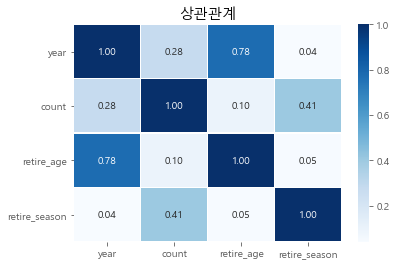

In [96]:
corr(nba_retire_merge,'상관관계')

In [98]:
nba_retire_merge.sort_values('count',ascending=False)

,name,year,count,retire_age,retire_season
21,Dwyane Wade,16,78,37,2019
40,Andrew Bogut,14,70,36,2020
35,Luol Deng,15,56,34,2019
2,Kevin Garnett,20,52,40,2016
31,Marvin Williams,15,50,34,2020
108,Trevor Booker,8,49,32,2019
65,Mo Williams,13,47,35,2018
7,Steve Nash,18,47,41,2014
76,David Lee,12,45,34,2017
81,Kevin Martin,12,45,33,2016
